In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from time import time
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from sklearn.svm import SVC

In [50]:
# Helper functions
def show_original_images(pixels):
    #Display original images
    fig, axes = plt.subplots(6,10, figsize=(11,7),subplot_kw={'xticks':[], 'yticks':[]})
    
    for i, ax in enumerate(axes.flat):
        ax.imshow(np.array(pixels)[i].reshape(64,64), cmap='gray')
        
def show_eigenfaces(pca):
    #Display Eigenfaces
    fig,axes = plt.subplots(3, 8, figsize=(9,4), subplot_kw={'xticks':[], 'yticks':[]})
    
    for i, ax in enumerate(axes.flat):
        ax.imshow(pca.components_[i].reshape(64,64), cmap='gray')
        ax.set_title("PC " + str(i+1))

## Step1: Read Dataset

In [51]:
df = pd.read_csv("face_data.csv")
df.head()

,0,1,2,3,4,5,6,7,8,9,...,4087,4088,4089,4090,4091,4092,4093,4094,4095,target
0,0.309917,0.367769,0.417355,0.442149,0.528926,0.607438,0.657025,0.677686,0.690083,0.685950,...,0.669422,0.652893,0.661157,0.475207,0.132231,0.148760,0.152893,0.161157,0.157025,0
1,0.454545,0.471074,0.512397,0.557851,0.595041,0.640496,0.681818,0.702479,0.710744,0.702479,...,0.157025,0.136364,0.148760,0.152893,0.152893,0.152893,0.152893,0.152893,0.152893,0
2,0.318182,0.400826,0.491736,0.528926,0.586777,0.657025,0.681818,0.685950,0.702479,0.698347,...,0.132231,0.181818,0.136364,0.128099,0.148760,0.144628,0.140496,0.148760,0.152893,0
3,0.198347,0.194215,0.194215,0.194215,0.190083,0.190083,0.243802,0.404959,0.483471,0.516529,...,0.636364,0.657025,0.685950,0.727273,0.743802,0.764463,0.752066,0.752066,0.739669,0
4,0.500000,0.545455,0.582645,0.623967,0.648760,0.690083,0.694215,0.714876,0.723140,0.731405,...,0.161157,0.177686,0.173554,0.177686,0.177686,0.177686,0.177686,0.173554,0.173554,0


In [52]:
labels=df['target']
pixels = df.drop(["target"], axis=1)

## Step 2: Visualize the pixels

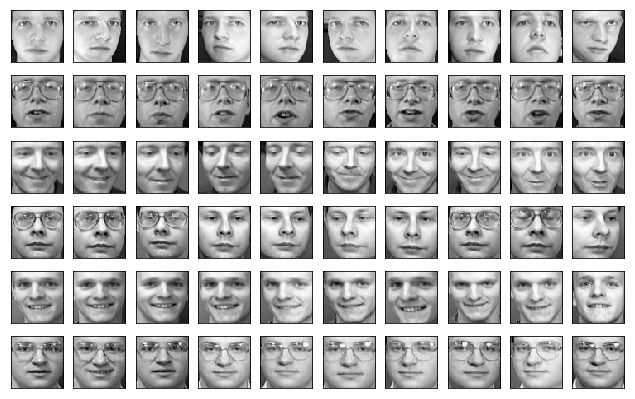

In [53]:
show_original_images(pixels)

## Step 3: Split data inot training and test dataset

In [54]:
X=pixels
y=labels
X_train, X_test, y_train, y_test = train_test_split(X, y)

## Step 4 : Perform PCA

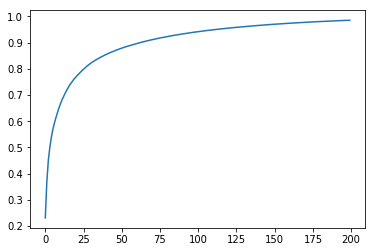

In [33]:
# pca = PCA(n_components=200)
# pca.fit(X_train)

# plt.plot(np.cumsum(pca.explained_variance_ratio_
                   


In [34]:
# In the plot we can see we are getting almost 95% variation from first 135 principal components
#So we choose 135 as n_components

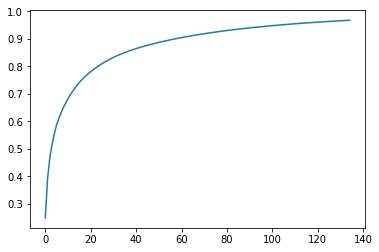

In [55]:
pca = PCA(n_components=135)
pca.fit(X_train)

plt.plot(np.cumsum(pca.explained_variance_ratio_))
                   


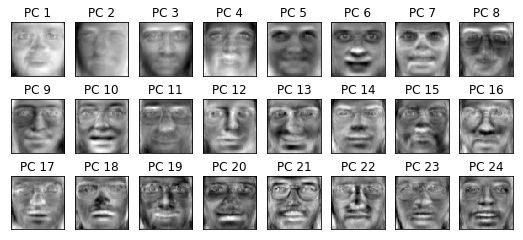

In [56]:
show_eigenfaces(pca)

## Step 5:  Project training data into PCA

In [57]:
X_train_pca = pca.transform(X_train)

## Step  6: Initialize Classifier and fit training data 

In [58]:
svc = SVC(kernel = 'rbf',C=1000,gamma=0.01)
svc = svc.fit(X_train_pca,y_train)



In [64]:
#Perform testing and get classification report

In [62]:
X_test_pca = pca.transform(X_test)

y_pred = svc.predict(X_test_pca)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         4
           2       0.80      1.00      0.89         4
           3       1.00      0.80      0.89         5
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         2
           6       0.00      0.00      0.00         0
           8       0.33      1.00      0.50         1
           9       0.80      1.00      0.89         4
          10       1.00      1.00      1.00         2
          11       1.00      1.00      1.00         2
          12       1.00      1.00      1.00         3
          13       1.00      1.00      1.00         1
          14       0.67      1.00      0.80         2
          15       1.00      0.50      0.67         4
          17       1.00      1.00      1.00         4
          18       1.00      1.00      1.00         4
          19       1.00      1.00      1.00         2
          20       1.00    

C:\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
